In [165]:
# Import the required libraries and dependencies
import panel as pn
import pandas as pd
import numpy as np
import seaborn as sns
import random
import hvplot.pandas
import holoviews as hv
from pathlib import Path
from panel.template import DarkTheme
pn.extension(sizing_mode='stretch_width')  # Component will responsively resize to stretch to the available width
from MCForecastTools import MCSimulation

In [114]:
from pyzipcode import ZipCodeDatabase
from uszipcode import SearchEngine
import re
engine = SearchEngine()
#regex = "^541[0-9]{2}"
#re.findall(, zcdb[54115])
latitudes = [z.lat for z in engine.by_prefix('916')][0]
longitudes = [z.lng for z in engine.by_prefix('916')][0]
print(latitudes)

34.16


In [115]:
# Function that takes a directory pathname and returns the list of csv files in that directory
def get_csvfiles(pathname):
    dir_path = Path(pathname)
    csvfile = []
    p = dir_path.glob('*.csv')
    files = [x for x in p if x.is_file()]
    for f in files:
        for part in f.parts:
            if not part.startswith('.') and part.endswith('.csv'):
                csvfile.append(part)
    return csvfile

In [116]:
# Create a path to the file and read into a dataframe
pathname = Path("Resources/Data/Loan_data.csv")
Loan_data = pd.read_csv(pathname)

C:\Users\Kuitche\anaconda3\envs\dev\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (19,49,59,118,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [117]:
#Loan_data['latitude'] = [z.lat for z in engine.by_prefix(Loan_data['zip_code'].str.replace("x",""))][0]
#Loan_data['longitude'] = [z.lng for z in engine.by_prefix(Loan_data['zip_code'].str.replace("x",""))][0]

In [118]:
directory_pathname = "Resources/Data/"
csv_filenames = get_csvfiles(directory_pathname)
for file in csv_filenames:
    print(file)

China_as_International_Lender.csv
Development_Credit_Authority_DCA.csv
Dollars_to_Results_Data.csv
ForeignAssistance_Complete.csv
ForeignAssistance_USAID_Only.csv
IBRD_Statement_Of_Loans_Historical_Data.csv
LoanData_Bondora.csv
Loan_data.csv
PPD2_Jan_21_2022.csv
USAID_Activity.csv
USAID_Anticorruption.csv
USAID_Public-Private_Partnerships.csv
World_Bank__IBRD__Bonds__1947-Present_.csv


# Data Cleaning
In this section, we read all the .csv files from a directory and extract the columns of interest


In [119]:
for col in Loan_data.columns:
    print(col)

Unnamed: 0
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
i

In [120]:
# Extract columns of interest
columns = ["Unnamed: 0", "loan_amnt", "term", "int_rate", "home_ownership", "dti", "loan_status", "purpose", "addr_state", "delinq_2yrs", "fico_range_low", "mths_since_last_delinq", "acc_now_delinq", "zip_code"]
Loan_data = Loan_data[columns]
Loan_data.rename(columns = {"Unnamed: 0": "member_id"}, inplace=True)
Loan_data

,member_id,loan_amnt,term,int_rate,home_ownership,dti,loan_status,purpose,addr_state,delinq_2yrs,fico_range_low,mths_since_last_delinq,acc_now_delinq,zip_code
0,13,18000.0,60 months,19.48,RENT,9.39,Charged Off,debt_consolidation,CA,0.0,665.0,NaN,0.0,916xx
1,25,4225.0,36 months,14.85,RENT,15.22,Charged Off,debt_consolidation,KS,2.0,725.0,18.0,0.0,672xx
2,30,16000.0,36 months,12.88,MORTGAGE,18.96,Charged Off,small_business,AL,0.0,675.0,33.0,0.0,354xx
3,31,24250.0,60 months,24.24,MORTGAGE,20.84,Charged Off,debt_consolidation,NY,0.0,660.0,NaN,0.0,114xx
4,33,25000.0,60 months,13.99,MORTGAGE,34.53,Charged Off,debt_consolidation,MD,0.0,730.0,NaN,0.0,212xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007982,2260691,32000.0,60 months,14.49,MORTGAGE,10.34,Charged Off,home_improvement,AZ,0.0,735.0,NaN,0.0,863xx
1007983,2260692,16000.0,60 months,12.79,RENT,12.25,Fully Paid,medical,NC,0.0,665.0,68.0,0.0,284xx
1007984,2260697,24000.0,60 months,14.49,RENT,18.30,Charged Off,debt_consolidation,FL,0.0,660.0,67.0,0.0,334xx
1007985,2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Columns manipulation
# Rename Columns
#	 customer_dataframe = customer_dataframe.rename(columns = {
#		“Full Name”: “full_name”, “Credit Card”: “credit_card_number”})
# Reorder Columns
#	 column_names = [“credit_card_number”, “Account_Balance”, “full_name”, “Email”, “Address”, “Zip Code”]
# Delete Columns
#	 customer_dataframe = customer_dataframe.drop(columns=[“full_name”])

In [122]:
# perform any necessary data cleaning steps
# Count or sum up nulls

#order_dataframe.isnull().value_counts()
#order_dataframe.isnull().sum()

# Drop nulls
# Ensure al the nulls are dropped
# Check data types
# if necessary, convert numeric columns to float

In [123]:
# perform any necessary data cleaning steps
Loan_data.isnull().sum()

member_id                      0
loan_amnt                     33
term                          33
int_rate                      33
home_ownership                33
dti                          327
loan_status                   33
purpose                       33
addr_state                    33
delinq_2yrs                   62
fico_range_low                33
mths_since_last_delinq    512283
acc_now_delinq                62
zip_code                      34
dtype: int64

In [124]:
Loan_data.dropna(inplace=True)
Loan_data.isnull().sum()

member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
home_ownership            0
dti                       0
loan_status               0
purpose                   0
addr_state                0
delinq_2yrs               0
fico_range_low            0
mths_since_last_delinq    0
acc_now_delinq            0
zip_code                  0
dtype: int64

In [125]:
Loan_data.reset_index(drop=True, inplace=True)

In [126]:
# checking for duplicate key values
if Loan_data['member_id'].duplicated().sum() > 0:
    Loan_data.drop_duplicates(inplace=True)
Loan_data

,member_id,loan_amnt,term,int_rate,home_ownership,dti,loan_status,purpose,addr_state,delinq_2yrs,fico_range_low,mths_since_last_delinq,acc_now_delinq,zip_code
0,25,4225.0,36 months,14.85,RENT,15.22,Charged Off,debt_consolidation,KS,2.0,725.0,18.0,0.0,672xx
1,30,16000.0,36 months,12.88,MORTGAGE,18.96,Charged Off,small_business,AL,0.0,675.0,33.0,0.0,354xx
2,66,16000.0,60 months,8.49,MORTGAGE,28.92,In Grace Period,credit_card,CA,0.0,720.0,39.0,0.0,936xx
3,68,20000.0,60 months,13.99,OWN,16.90,Charged Off,debt_consolidation,MD,0.0,680.0,33.0,0.0,210xx
4,83,23100.0,60 months,20.50,OWN,20.43,Charged Off,car,DE,0.0,660.0,47.0,0.0,197xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495582,2260674,20000.0,60 months,15.59,MORTGAGE,12.36,Fully Paid,renewable_energy,CA,0.0,665.0,62.0,0.0,950xx
495583,2260675,16000.0,60 months,10.99,MORTGAGE,12.40,Fully Paid,debt_consolidation,NY,1.0,745.0,10.0,0.0,112xx
495584,2260677,11200.0,60 months,13.49,RENT,4.80,Charged Off,debt_consolidation,WA,0.0,665.0,75.0,0.0,981xx
495585,2260692,16000.0,60 months,12.79,RENT,12.25,Fully Paid,medical,NC,0.0,665.0,68.0,0.0,284xx


In [127]:
# Insert latitudes and longitudes based on zipcode prefix
Loan_data['zip_code'] = Loan_data['zip_code'].str.replace("x","")
#Loan_data['latitude'] = [z.lat for z in engine.by_prefix(Loan_data['zip_code'])][0]
#Loan_data['longitude'] = [z.lng for z in engine.by_prefix(Loan_data['zip_code'])][0]
Loan_data

,member_id,loan_amnt,term,int_rate,home_ownership,dti,loan_status,purpose,addr_state,delinq_2yrs,fico_range_low,mths_since_last_delinq,acc_now_delinq,zip_code
0,25,4225.0,36 months,14.85,RENT,15.22,Charged Off,debt_consolidation,KS,2.0,725.0,18.0,0.0,672
1,30,16000.0,36 months,12.88,MORTGAGE,18.96,Charged Off,small_business,AL,0.0,675.0,33.0,0.0,354
2,66,16000.0,60 months,8.49,MORTGAGE,28.92,In Grace Period,credit_card,CA,0.0,720.0,39.0,0.0,936
3,68,20000.0,60 months,13.99,OWN,16.90,Charged Off,debt_consolidation,MD,0.0,680.0,33.0,0.0,210
4,83,23100.0,60 months,20.50,OWN,20.43,Charged Off,car,DE,0.0,660.0,47.0,0.0,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495582,2260674,20000.0,60 months,15.59,MORTGAGE,12.36,Fully Paid,renewable_energy,CA,0.0,665.0,62.0,0.0,950
495583,2260675,16000.0,60 months,10.99,MORTGAGE,12.40,Fully Paid,debt_consolidation,NY,1.0,745.0,10.0,0.0,112
495584,2260677,11200.0,60 months,13.49,RENT,4.80,Charged Off,debt_consolidation,WA,0.0,665.0,75.0,0.0,981
495585,2260692,16000.0,60 months,12.79,RENT,12.25,Fully Paid,medical,NC,0.0,665.0,68.0,0.0,284


In [128]:
#lat = random.choice([z.lat for z in engine.by_prefix(Loan_data.iloc[index, Loan_data.columns.get_loc("zip_code")])])
Loan_data_zip = Loan_data.groupby('zip_code').sum().reset_index()
Loan_data_zip

,zip_code,member_id,loan_amnt,int_rate,dti,delinq_2yrs,fico_range_low,mths_since_last_delinq,acc_now_delinq
0,007,5233458,87500.0,77.22,117.68,6.0,3405.0,60.0,1.0
1,008,1741302,8400.0,11.44,23.47,1.0,690.0,6.0,0.0
2,009,1107915,8000.0,9.80,14.69,0.0,690.0,48.0,0.0
3,010,1113611368,12292725.0,11561.36,14667.73,578.0,574965.0,27283.0,9.0
4,011,372340054,3633800.0,3963.69,4690.73,193.0,184430.0,8722.0,5.0
...,...,...,...,...,...,...,...,...,...
909,995,772400493,9206025.0,8192.93,10602.44,288.0,389115.0,20010.0,3.0
910,996,373236657,4745575.0,3987.82,5195.78,135.0,187415.0,9812.0,1.0
911,997,303388012,3774700.0,3411.70,4901.62,165.0,153730.0,7194.0,3.0
912,998,111255570,1161800.0,1132.86,1375.19,41.0,55635.0,2806.0,1.0


In [40]:
Loan_data_zip.index

RangeIndex(start=0, stop=914, step=1)

In [41]:
latitudes = {}
longitudes = {}
'''
for i in Loan_data_zip.index:
    
    print([z.lat for z in engine.by_prefix(i)][0])
    print(f"{i}\n")
    #Loan_data.loc[index, "lat"] = random.choice([z.lat for z in engine.by_prefix(Loan_data.loc[index, "zip_code"])])
    #latitudes[i] = [z.lat for z in engine.by_prefix(i)][0]
    #longitudes[i] = [z.lng for z in engine.by_prefix(i)][0]
'''

'\nfor i in Loan_data_zip.index:\n    \n    print([z.lat for z in engine.by_prefix(i)][0])\n    print(f"{i}\n")\n    #Loan_data.loc[index, "lat"] = random.choice([z.lat for z in engine.by_prefix(Loan_data.loc[index, "zip_code"])])\n    #latitudes[i] = [z.lat for z in engine.by_prefix(i)][0]\n    #longitudes[i] = [z.lng for z in engine.by_prefix(i)][0]\n'

In [42]:
Loan_data

,member_id,loan_amnt,term,int_rate,home_ownership,dti,loan_status,purpose,addr_state,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,zip_code
0,25,4225.0,36 months,14.85,RENT,15.22,Charged Off,debt_consolidation,KS,2.0,18.0,0.0,672
1,30,16000.0,36 months,12.88,MORTGAGE,18.96,Charged Off,small_business,AL,0.0,33.0,0.0,354
2,66,16000.0,60 months,8.49,MORTGAGE,28.92,In Grace Period,credit_card,CA,0.0,39.0,0.0,936
3,68,20000.0,60 months,13.99,OWN,16.90,Charged Off,debt_consolidation,MD,0.0,33.0,0.0,210
4,83,23100.0,60 months,20.50,OWN,20.43,Charged Off,car,DE,0.0,47.0,0.0,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495582,2260674,20000.0,60 months,15.59,MORTGAGE,12.36,Fully Paid,renewable_energy,CA,0.0,62.0,0.0,950
495583,2260675,16000.0,60 months,10.99,MORTGAGE,12.40,Fully Paid,debt_consolidation,NY,1.0,10.0,0.0,112
495584,2260677,11200.0,60 months,13.49,RENT,4.80,Charged Off,debt_consolidation,WA,0.0,75.0,0.0,981
495585,2260692,16000.0,60 months,12.79,RENT,12.25,Fully Paid,medical,NC,0.0,68.0,0.0,284


In [129]:
correlation = Loan_data.corr()
correlation

,member_id,loan_amnt,int_rate,dti,delinq_2yrs,fico_range_low,mths_since_last_delinq,acc_now_delinq
member_id,1.000000,-0.053841,0.008476,-0.075161,-0.025864,0.070465,0.015641,-0.014861
loan_amnt,-0.053841,1.000000,0.185634,0.027384,0.011681,0.109234,-0.022332,0.003985
int_rate,0.008476,0.185634,1.000000,0.141701,0.035148,-0.346914,-0.031650,0.015240
dti,-0.075161,0.027384,0.141701,1.000000,-0.004375,-0.030398,0.010492,0.005666
delinq_2yrs,-0.025864,0.011681,0.035148,-0.004375,1.000000,-0.119319,-0.555855,0.107472
fico_range_low,0.070465,0.109234,-0.346914,-0.030398,-0.119319,1.000000,0.092275,-0.034892
mths_since_last_delinq,0.015641,-0.022332,-0.031650,0.010492,-0.555855,0.092275,1.000000,-0.138474
acc_now_delinq,-0.014861,0.003985,0.015240,0.005666,0.107472,-0.034892,-0.138474,1.000000


The interest rate seems to be correlated to the loan amount.  
And the rate seems to depend on the debt-to-income ratio.

<AxesSubplot:title={'center':'Distribution of loans by purposes'}, ylabel='loan_amnt'>

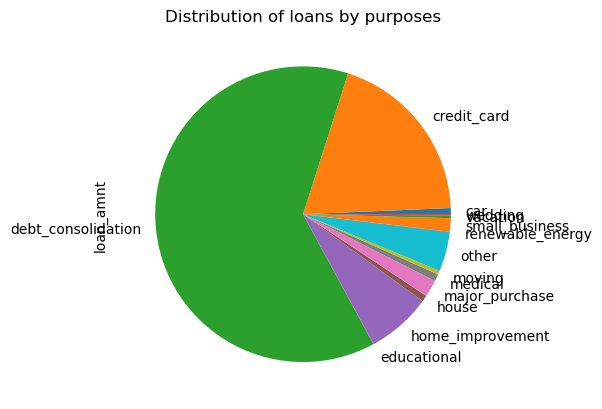

In [130]:
loan_purpose = Loan_data.groupby("purpose").sum()
loan_purpose.plot(kind='pie', y="loan_amnt", legend=False, title="Distribution of loans by purposes")
#loan_purpose.hvplot.bar(x=y="loan_amnt", legend=True, title="Distribution of loans by purposes")

Debt consolidation seems to be the major reason for loans, followed by credit card, then home improvement.

In [131]:
# Interest rate vs loan purpose
loan_rate = Loan_data.groupby("purpose").median()
loan_rate.sort_values("int_rate").hvplot.bar(y="int_rate", rot=45, ylabel="Median Interest Rate", width=700)

:Bars   [purpose]   (int_rate)

In [132]:
# Interest rate vs delinquency
loan_rate_delinq = Loan_data.groupby("delinq_2yrs").median()
loan_rate_delinq.sort_values("int_rate").hvplot.bar(y="int_rate", rot=90, ylabel="Median Interest Rate")

:Bars   [delinq_2yrs]   (int_rate)

In [133]:
# Interest rate vs loan status
loan_rate_status = Loan_data.groupby("loan_status").median()
loan_rate_status.sort_values("int_rate").hvplot.bar(y="int_rate", rot=45, ylabel="Median Interest Rate", height=700)

:Bars   [loan_status]   (int_rate)

In [148]:
# Interest rate vs credit score
loan_rate_cr = Loan_data.groupby("fico_range_low").median()
loan_rate_cr.hvplot.bar(y="int_rate", rot=90, ylabel="Median Interest Rate", size=(700, 1500))

:Bars   [fico_range_low]   (int_rate)

Fully paid borrowers seem to benefit lower interest rates.
High number of delinquencies during the past 2 years appears to affect the interest rate, but there doesn't seem to be a proportional relationship; meaning it is combined with other factors.
The median interest rate doesn't varie much with the purpose of the loan, though small businesses are having lightly higher rates

In [169]:
# Let's assume that all loans not fully paid are at risk; which includes defaults and late payments
loan_status = Loan_data.copy()
loan_status.loc[loan_status["loan_status"].str.contains("Fully Paid"), "loan_status"] ="Fully Paid"
loan_status.loc[loan_status["loan_status"].str.contains("Fully Paid")==False, "loan_status"] ="At Risk"
#loan_status= loan_status.groupby(["purpose", "loan_status"]).sum()

In [69]:
loan_status_plot = loan_status[["loan_amnt", "purpose", "loan_status"]]

In [79]:
bars = hv.Bars(loan_status_plot, kdims=["purpose", "loan_status"]).aggregate(function=np.sum)
bars.opts(width=1500, stacked=True, xrotation=45)

:Bars   [purpose,loan_status]   (loan_amnt)

While Debt consolidation has the highest change of being fully paid, it's also the most riskiest; followed by Credit card and home improvement.
Credit cards are 

In [149]:
#loan_status.plot(kind='pie', y="loan_amnt", legend=False, title="Distribution of loans by purposes")
'''
loan_status.hvplot.bar(x="loan_amnt", y=["loan_status","purpose"], 
                       #by="loan_amnt", 
                       #rot=90, 
                       width = 1500,
                       height = 900,
                       ylim = (20000, 45000),
                       legend=True,
                   invert=True
                      #ylim = (loan_status.loc[:,"loan_amnt"].min(), loan_status.loc[:,"loan_amnt"].max())
                      )
'''

'\nloan_status.hvplot.bar(x="loan_amnt", y=["loan_status","purpose"], \n                       #by="loan_amnt", \n                       #rot=90, \n                       width = 1500,\n                       height = 900,\n                       ylim = (20000, 45000),\n                       legend=True,\n                   invert=True\n                      #ylim = (loan_status.loc[:,"loan_amnt"].min(), loan_status.loc[:,"loan_amnt"].max())\n                      )\n'

In [ ]:
#loan_purpose = loan_status.groupby("purpose").sum()
#loan_status= loan_status.groupby(["loan_status"]).sum()['loan_amnt']
loan_status.plot.bar(x="loan_status", y='loan_amnt', by="purpose", rot=90, title="Distribution of loans by purposes")

In [90]:
# Loan status vs debt-to-income ratio
loan_status_box = loan_status[["dti", "int_rate", "delinq_2yrs", "loan_status"]]
y = ["dti", "int_rate", "delinq_2yrs"]
loan_status_box.hvplot.box('dti', by='loan_status')

:BoxWhisker   [loan_status]   (dti)

In [88]:
# loan status vs interest rate
loan_status_box.hvplot.box('int_rate', by='loan_status')

:BoxWhisker   [loan_status]   (int_rate)

In [89]:
# Loan status vs. past 2 years delinquency
loan_status_box.hvplot.box('delinq_2yrs', by='loan_status')

:BoxWhisker   [loan_status]   (delinq_2yrs)

In [20]:
# Check interest_rate vs dti
Loan_data.hvplot.hist("int_rate")

:Histogram   [int_rate]   (int_rate_count)

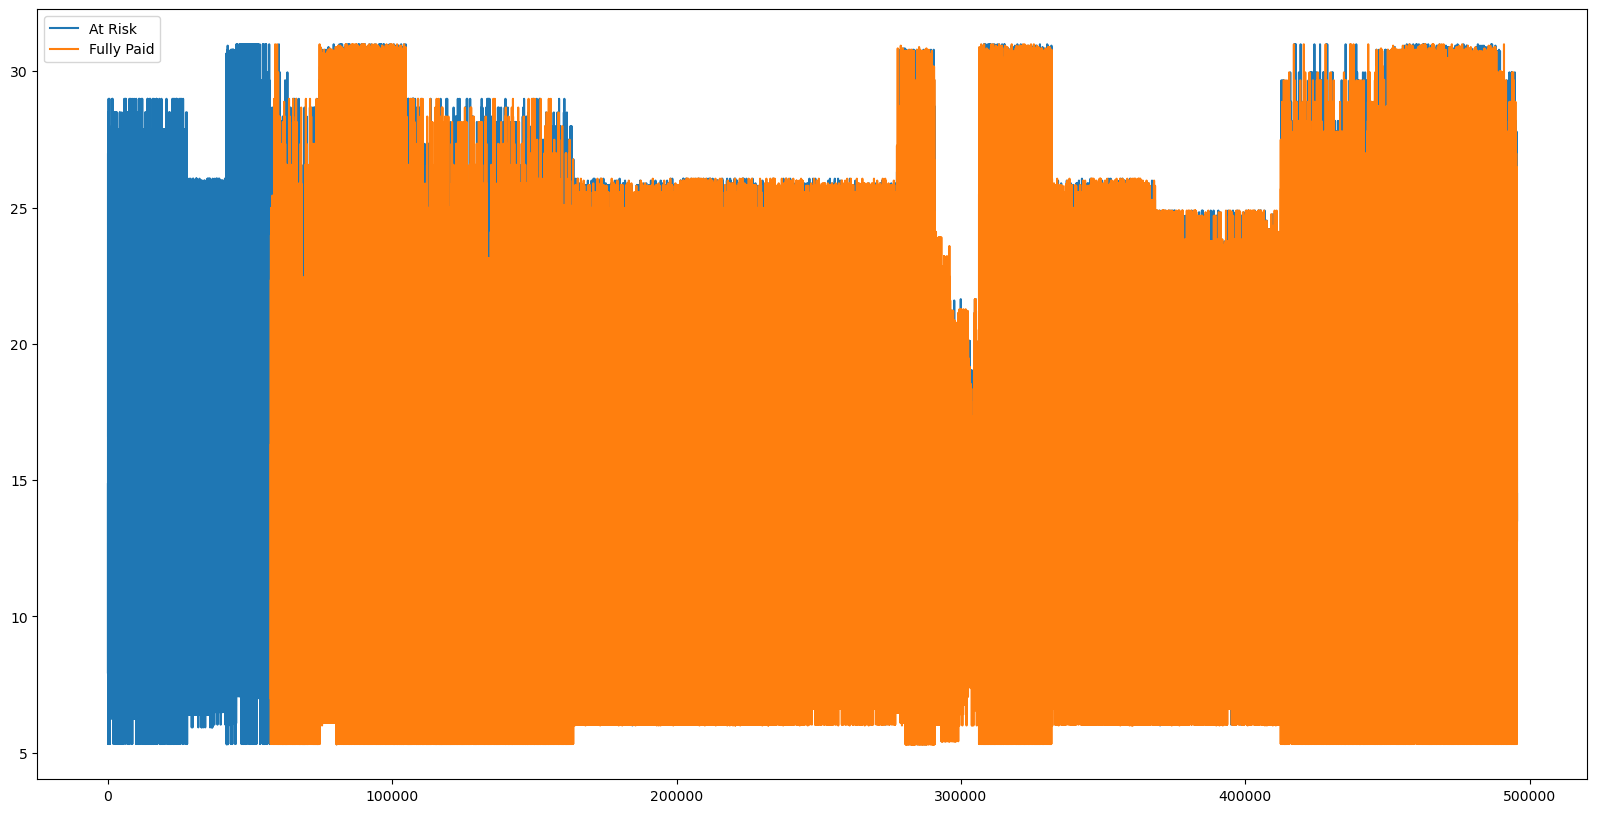

In [168]:
#loan_data_plot = Loan_data.groupby("term").median()
loan_data_plot = loan_status.groupby('loan_status')['int_rate'].plot(legend=True, figsize=(20, 10))

In [196]:
loan_rates = loan_status.pivot_table(values="int_rate", index="dti", columns="loan_status")
loan_rates

loan_status,At Risk,Fully Paid
dti,,
-1.00,NaN,11.620000
0.00,14.608941,13.541045
0.01,6.000000,15.716667
0.02,13.927500,13.126667
0.03,NaN,11.990000
...,...,...
765.76,12.620000,NaN
797.10,NaN,16.020000
831.97,9.440000,NaN


In [189]:
loan_rates.dropna(inplace=True)
loan_rates

loan_status,At Risk,Fully Paid
dti,,
0.00,14.608941,13.541045
0.01,6.000000,15.716667
0.02,13.927500,13.126667
0.05,8.900000,5.320000
0.06,12.290000,10.043333
...,...,...
86.19,17.990000,17.990000
88.52,16.020000,11.980000
92.00,26.770000,11.490000


In [190]:
weights = [0.6, 0.4]
loan_returns = loan_rates.dot(weights)
loan_returns.head()

dti
0.00    14.181783
0.01     9.886667
0.02    13.607167
0.05     7.468000
0.06    11.391333
dtype: float64

In [191]:
volatility = loan_rates.std() * np.sqrt(252)
volatility

loan_status
At Risk       36.590598
Fully Paid    31.890909
dtype: float64

<AxesSubplot:xlabel='dti'>

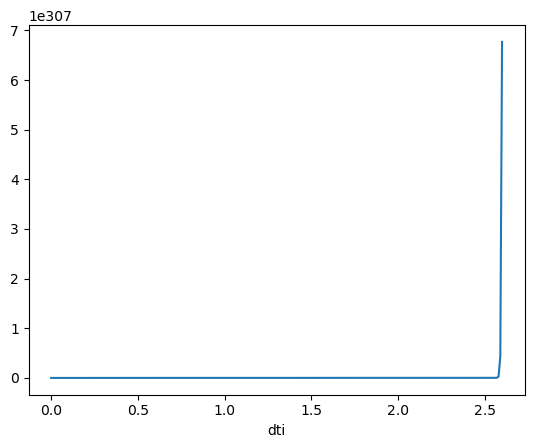

In [192]:
# Higher Volalitity Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.6, 0.4]
loan_returns = loan_rates.dot(weights)
cumulative_returns = (1 + loan_returns).cumprod()
(initial_investment * cumulative_returns).plot()

In [193]:
# Evaluate Reward-to-Risk (Sharpe Ratio)
sharpe_ratios = (loan_rates.mean() * 252) / (loan_rates.std() * np.sqrt(252))
sharpe_ratios

loan_status
At Risk       111.953148
Fully Paid    111.214480
dtype: float64

In [194]:
# Visualize the distribution of interest rates across all loan statuses using a density plot
loan_rates.hvplot.kde(y=["At Risk", "Fully Paid"])

:NdOverlay   [loan_status]
   :Distribution   [value]   (Density)

In [203]:
loan_status = loan_status.set_index("dti")
At_Risk = loan_status[loan_status['loan_status']=='At Risk'].drop('loan_status', axis=1)
Fully_Paid = loan_status[loan_status['loan_status']=='Fully Paid'].drop('loan_status', axis=1)
loan_rates = pd.concat([At_Risk, Fully_Paid], axis=1, keys=["At Risk", "Fully_Paid"])
loan_rates.dropna()

Empty DataFrame
Columns: [(At Risk, member_id), (At Risk, loan_amnt), (At Risk, term), (At Risk, int_rate), (At Risk, home_ownership), (At Risk, dti), (At Risk, purpose), (At Risk, addr_state), (At Risk, delinq_2yrs), (At Risk, fico_range_low), (At Risk, mths_since_last_delinq), (At Risk, acc_now_delinq), (At Risk, zip_code), (Fully_Paid, member_id), (Fully_Paid, loan_amnt), (Fully_Paid, term), (Fully_Paid, int_rate), (Fully_Paid, home_ownership), (Fully_Paid, dti), (Fully_Paid, purpose), (Fully_Paid, addr_state), (Fully_Paid, delinq_2yrs), (Fully_Paid, fico_range_low), (Fully_Paid, mths_since_last_delinq), (Fully_Paid, acc_now_delinq), (Fully_Paid, zip_code)]
Index: []

[0 rows x 26 columns]

In [199]:
loan_rates.reset_index(drop=True, inplace=True)
loan_rates.dropna(inplace=True)
loan_rates

loan_status,At Risk,Fully Paid
1,14.608941,13.541045
2,6.000000,15.716667
3,13.927500,13.126667
6,8.900000,5.320000
7,12.290000,10.043333
...,...,...
5563,17.990000,17.990000
5575,16.020000,11.980000
5591,26.770000,11.490000
5635,16.020000,13.060000


In [200]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = loan_rates,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

In [ ]:
# # Assess data quality by identifying the # of time a value occurs
	 order_dataframe[“customer_no”].value_counts()
# Assess data quality by checking for duplicate rows
	 order_dataframe.duplicated()
# Assess data quality by checking for duplicate key values
	 order_dataframe[“customer_no”].duplicated()
# Cleanse data by dropping duplicates and check for customer_no
	 order_dataframe = order_dataframe.drop_duplicates().copy()
	order_dataframe[“customer_no”].duplicated()
# Cleanse data by replacing currency symbols
	 order_dataframe[“order_total”] = order_dataframe[“order_total”].str.replace(“$”, “”)
# Convert “order_total” from object to float
order_dataframe.dtypes
order_dataframe[“order_total”] = order_dataframe[“order_total”].astype(“float”)


## Using default templates
Panel ships with a number of default [templates](https://panel.holoviz.org/user_guide/Templates.html), which are defined by declaring four main content areas on the page, which can be populated as desired:  
* **header**: The header area of the HTML page
* **sidebar**: A collapsible sidebar
* **main**: The main area of the application
* **modal**: A modal, i.e. a dialog box/popup window  

### Supported templates
Panel ships with a number of these default themes built on different CSS frameworks:
* **MaterialTemplate**: Built on Material Components for the web
* **BootstrapTemplate**: Built on Bootstrap v4
* **VanillaTemplate**: Built using pure CSS without relying on any specific framework
* **FastListTemplate**: Built on the Fast UI framework using a list-like API
* **FastGridTemplate**: Built on the Fast UI framework using grid-like API
* **GoldenTemplate**: Built on the Golden Layout framework

Unlike other layout components however, the contents of the areas is fixed once rendered.  
If you need a dynamic layout you should therefore insert a regular Panel layout [component](https://panel.holoviz.org/user_guide/Components.html) (e.g. a Column or Row) and modify it in place once added to one of the content areas.   

Panel provides a wide range of components for easily composing panels, apps, and dashboards both in the notebook and as standalone apps.   
The components can be broken down into three broad classes of objects:   
* **Pane** objects allow wrapping external viewable items like Bokeh, Plotly, Vega, or HoloViews plots, so they can be embedded in a panel.
* **Widget** objects provide controls that can trigger Python or JavaScript events.
* **Panel** layout objects allow combining plots into a ***Row***, ***Column***, ***Tabs*** or a ***Grid***.  

## Panes
Pane objects makes it possible to display and arrange a wide range of plots and other media on a page, including plots (e.g. Matplotlib, Bokeh, Vega/Altair, HoloViews, Plotly), images (e.g. PNGs, SVGs, GIFs, JPEGs), and various markup languages (e.g. Markdown, HTML, LaTeX).

## Widgets
Widget components, like all objects in Panel, sync their parameter state between all views of the object. Widget objects have a value parameter, layout parameters, and other parameters specific to each widget. In the notebook we can display widgets just like other Panel objects:
widget = pn.widgets.TextInput(name='A widget', value='A string')

## Panels
There are four main types of Panels:

* **Row**: A Row arranges a list of components horizontally.
* **Column**: A Column arranges a list of components vertically.
* **Tabs**: A Tabs object lays out a list of components as selectable tabs.
* **GridSpec**: A GridSpec lays out components on a grid.
* **Spacer** components are also provided, to control spacing between other components.

The Row, Column, and Tabs Panels all behave very similarly. All of them are list-like, which means they have many of the same methods as a simple Python list, making it easy to add, replace, and remove components interactively using append, extend, clear, insert, pop, remove

Once the extension is loaded, Panel objects will display themselves in the notebook, outside the notebook objects can be displayed in a server using the **show** method or run from the commandline by appending **.serveable()** to the objects to be displayed.

In [ ]:
# Building Layout

dark_material = pn.template.MaterialTemplate(title='Material Template', theme=DarkTheme)

dark_material.header.append("THIS IS THE HEADER")
dark_material.sidebar.append(sfo_data_df.head(5))
dark_material.sidebar.append(prices_by_year_by_neighborhood.tail(5))

dark_material.main.append(
    pn.Column(
        pn.Card(bar_plot, title='Bar'),
        pn.Card(map_plot, title='Map')
    )
)
dark_material.show()